## Import Dataset

In [8]:
# import opendatasets as od
# od.download("https://www.kaggle.com/datasets/deepcontractor/monkeypox-dataset-daily-updated",force = True)

In [3]:
import os
# os.chdir('monkeypox-dataset-daily-updated/')

In [4]:
!pip install waterfallcharts

  Preparing metadata (setup.py) ... done
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3413 sha256=80266a800bfbdd518320e72e61804cfc6809e0d9263b8cb288247dc2c60549e3
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts


In [5]:
!pip uninstall statsmodels -y

Found existing installation: statsmodels 0.12.2
Uninstalling statsmodels-0.12.2:
  Successfully uninstalled statsmodels-0.12.2


In [6]:
!pip install statsmodels==0.12.2

  Using cached statsmodels-0.12.2-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.19.0 requires statsmodels>=0.13, but you have statsmodels 0.12.2 which is incompatible.


In [7]:
import statsmodels
statsmodels.__version__

'0.12.2'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import waterfall_chart
import datetime
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [9]:
df_daily = pd.read_csv('../input/monkeypox-dataset-daily-updated/Daily_Country_Wise_Confirmed_Cases.csv',skipinitialspace=True)
df_world = pd.read_csv('../input/monkeypox-dataset-daily-updated/Monkey_Pox_Cases_Worldwide.csv',skipinitialspace=True)
df_world_timeline = pd.read_csv('../input/monkeypox-dataset-daily-updated/Worldwide_Case_Detection_Timeline.csv',skipinitialspace=True)

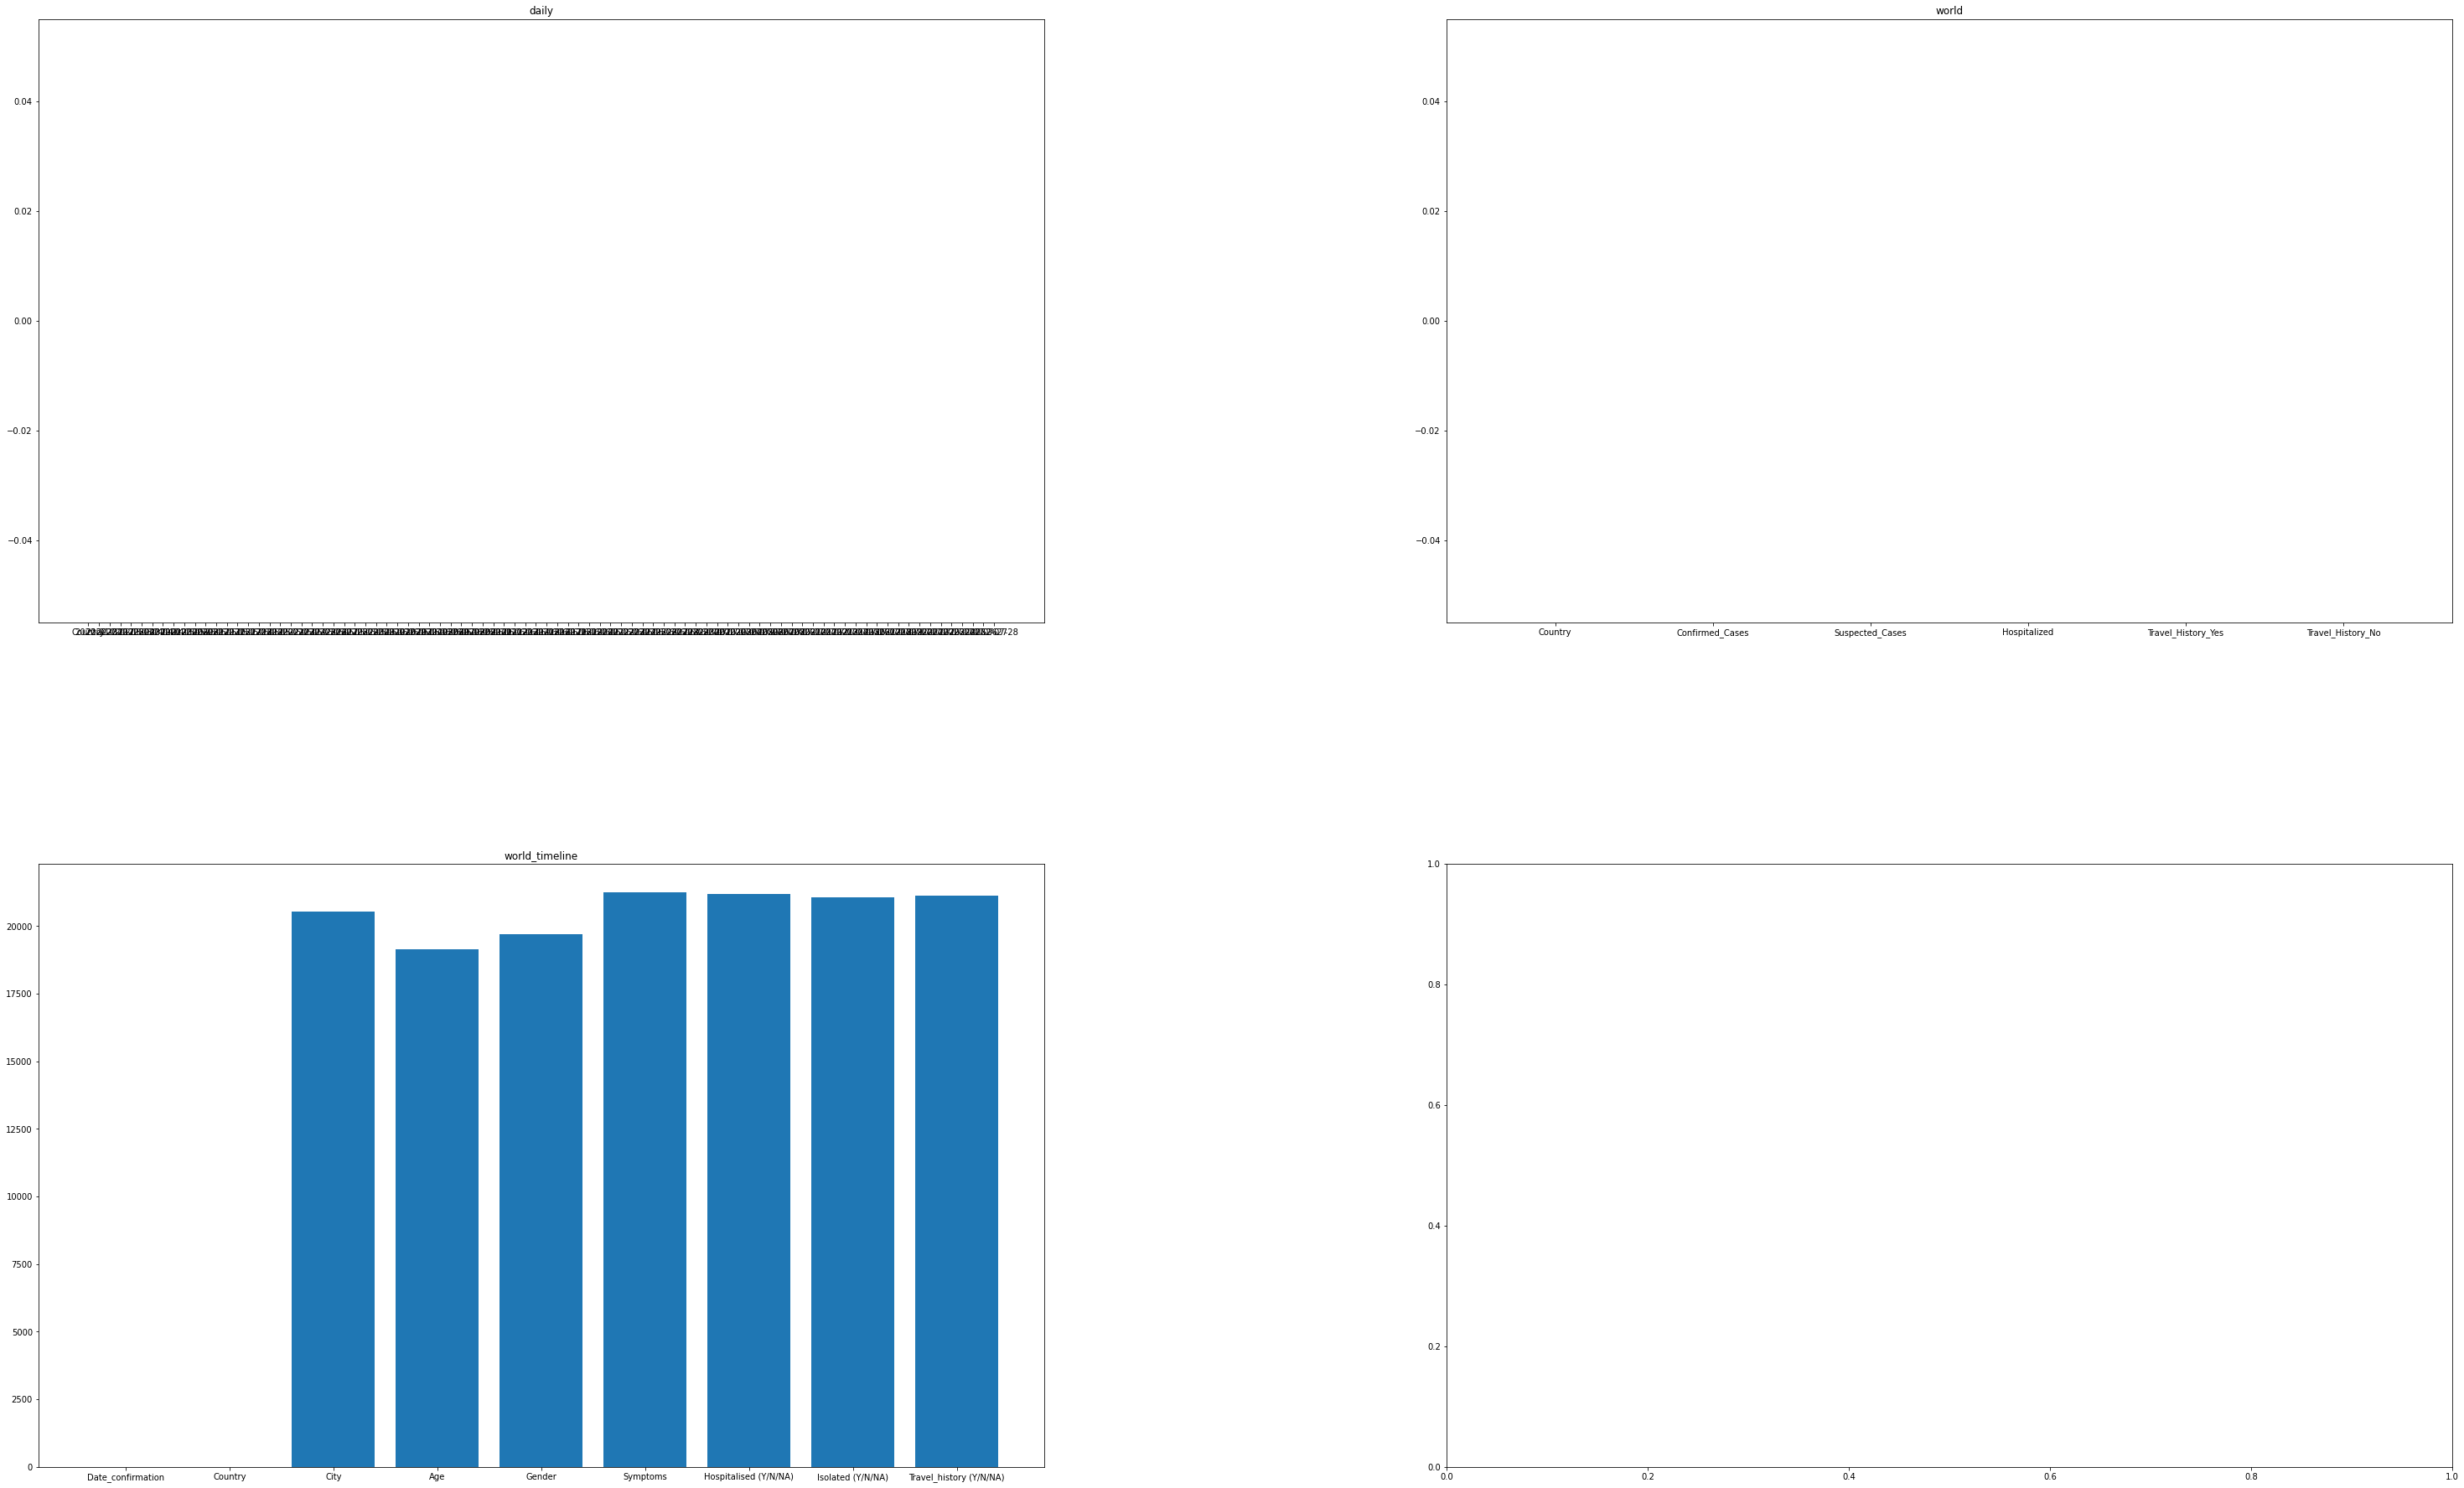

In [10]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (50,30),squeeze=False)
ax = ax.ravel()
frames = [df_daily,df_world,df_world_timeline]
names = ['daily','world','world_timeline']
for i in range(3):
    ax[i].bar(height = frames[i].isnull().sum().values,x = frames[i].isnull().sum().index)
    ax[i].set_title(names[i])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

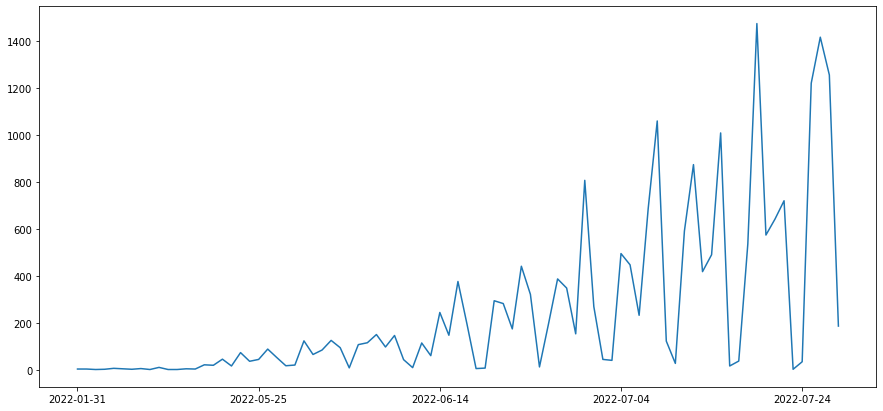

In [11]:
plt.figure(figsize = (15,7))
df_daily.sum().drop('Country').plot(kind = 'line')
plt.show()

In [12]:
daily_sum = df_daily.sum().drop('Country').reset_index()
daily_sum.columns = ['Date','Value']
daily_sum['Value'] = daily_sum['Value'].astype('int')

In [13]:
daily_sum['Date'] = pd.to_datetime(daily_sum['Date'])

In [14]:
daily_sum['Date'] = daily_sum['Date'].dt.strftime("%Y-%m-%d")


In [15]:
daily_sum = daily_sum.groupby('Date')['Value'].sum()

In [16]:
daily_sum = daily_sum.reset_index()

In [17]:
daily_sum.set_index('Date')

,Value
Date,
2022-01-31,3
2022-02-17,3
2022-02-28,1
2022-03-04,2
2022-03-31,6
2022-04-10,4
2022-04-12,2
2022-04-30,5
2022-05-06,1


**ACF is for Moving Average (MA) part of the ARIMA Model
The rule of thumb to decide (p,q) where p is for autoregressive part and q is for moving average part; for an ARIMA model is
How many values are going above or below the upper and low limits of the plot
Here in the acf we see, 5 values are above the upper limit, so for moving average, no of lags (q) = 5**

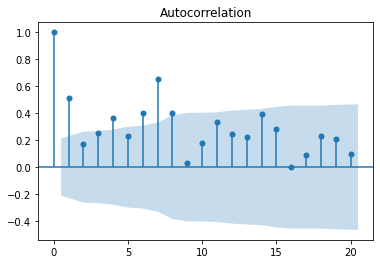

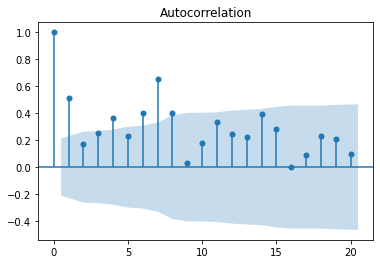

In [18]:
plot_acf(x = daily_sum['Value'],lags= 20)

**Autocorrelation is high. Future data is highly dependent on past data**

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

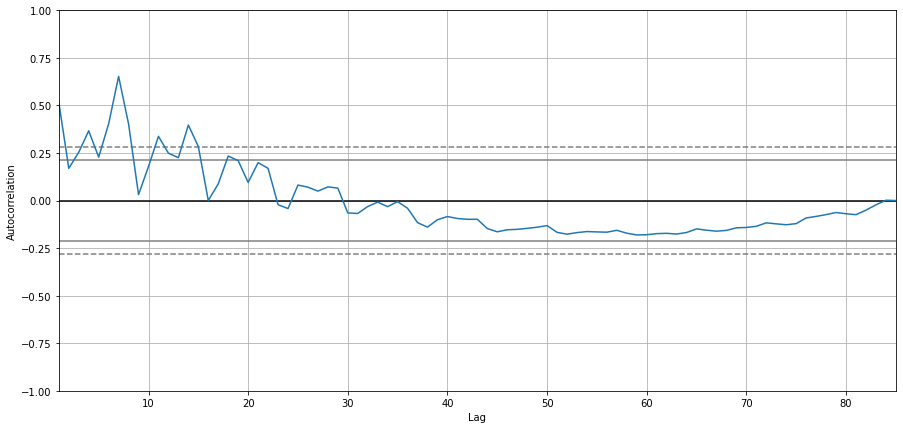

In [19]:
plt.figure(figsize = (15,7))
autocorrelation_plot(daily_sum['Value'])

**Using PACF to compute number of lags for the Autoregressive part**

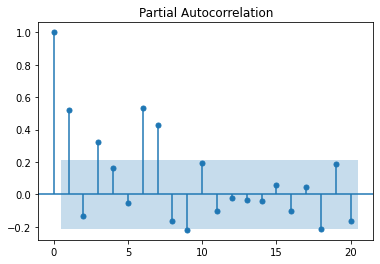

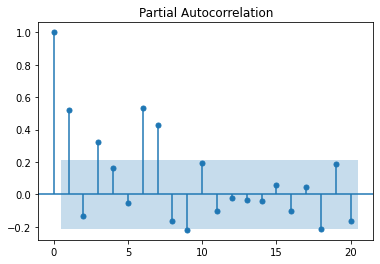

In [20]:
plot_pacf(x = daily_sum['Value'])

**Same as the concept for moving average q value selection, for autoregressive part as well, we can select p as 6**

**However, we are going to use something like gridsearchcv**

**Checking for stationarity**

In [21]:
from statsmodels.tsa.stattools import adfuller
#As per adfuller test
#Null Hypothesis (Ho): Data is not stationary
#Alternate Hypothesis (H1): Data is stationary
def adfuller_test(value):
    output = adfuller(value)
    labels = ["Test-Statistic","p-val","lags used","No of observations used"]
    
    for label,value in zip(labels,output):
        print(label+": "+str(value))
        
    if output[1]<=0.05:
        print("Reject the null hypothesis. Data is stationary")

    else:
        print("Null Hypothesis is true. Data is non-stationary")
    
adfuller_test(daily_sum['Value'])

Test-Statistic: 2.7222635610018386
p-val: 0.9990878690214448
lags used: 12
No of observations used: 72
Null Hypothesis is true. Data is non-stationary


In [22]:
#Shifting the data
daily_sum['Shift_1_diff'] = daily_sum['Value'] - daily_sum['Value'].shift(1)


In [23]:
daily_sum.head()

,Date,Value,Shift_1_diff
0,2022-01-31,3,NaN
1,2022-02-17,3,0.0
2,2022-02-28,1,-2.0
3,2022-03-04,2,1.0
4,2022-03-31,6,4.0


In [24]:
print(daily_sum.shape)

(85, 3)


In [25]:
daily_sum.set_index('Date',inplace = True)
daily_sum

,Value,Shift_1_diff
Date,,
2022-01-31,3,NaN
2022-02-17,3,0.0
2022-02-28,1,-2.0
2022-03-04,2,1.0
2022-03-31,6,4.0
2022-04-10,4,-2.0
2022-04-12,2,-2.0
2022-04-30,5,3.0
2022-05-06,1,-4.0


In [26]:
adfuller_test(daily_sum['Shift_1_diff'].dropna())

Test-Statistic: -4.720757407912233
p-val: 7.69130755399391e-05
lags used: 7
No of observations used: 76
Reject the null hypothesis. Data is stationary


Text(0.5, 1.0, 'Is it stationary?')

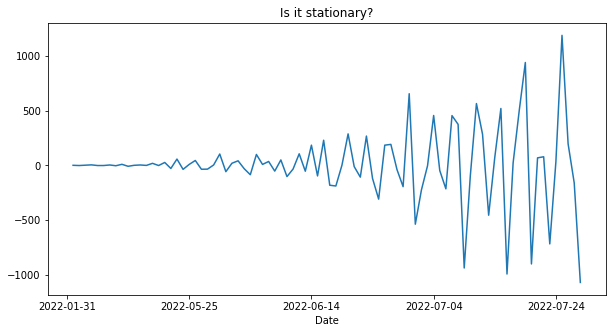

In [27]:
plt.figure(figsize = (10,5))
daily_sum['Shift_1_diff'].plot()
plt.title("Is it stationary?", fontsize = 12)

**Data is stationary**

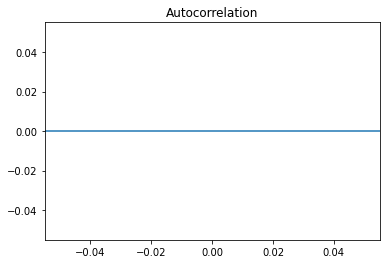

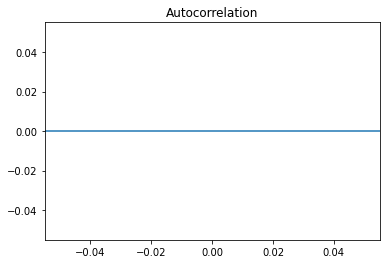

In [28]:
plot_acf(x = daily_sum['Shift_1_diff'],lags= 20)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

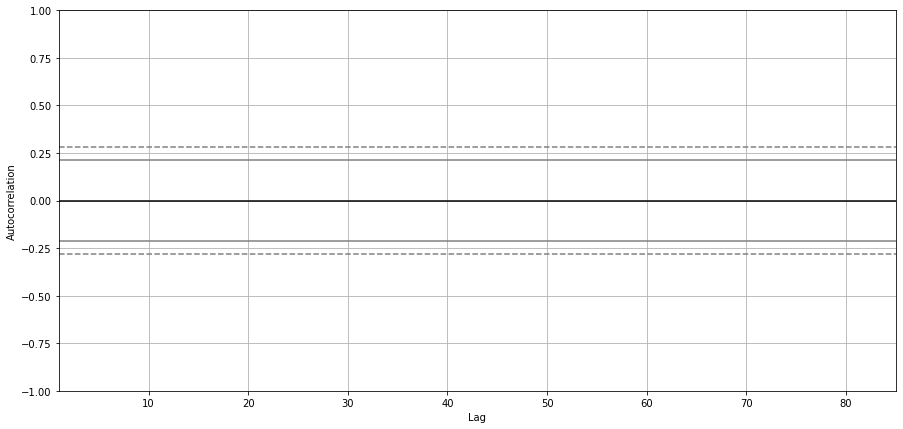

In [29]:
plt.figure(figsize = (15,7))
autocorrelation_plot(daily_sum['Shift_1_diff'])

**No Correlation Among Data**

**Autoregressive Model**

In [30]:
#Here, from the graph, the entire: Autoregressive shut down is at 0 i.e p = 0
#Moving Average Shutdown is 0 i.e q = 0
#Consider d = 1 since lag is 1

#Selecting ARIMA as the data is not seasonal

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [31]:
dataset=daily_sum['Value'].values.astype('float32')
train_size = int(len(dataset)*0.95)
train,test = dataset[0:train_size],dataset[train_size:]
sc = MinMaxScaler(feature_range=(0,1))
train = np.reshape(sc.fit_transform(train.reshape(-1,1)),newshape=(1,-1))[0]
test = np.reshape(sc.fit_transform(test.reshape(-1,1)),newshape=(1,-1))[0]
print(train.shape)
print(test.shape)

(80,)
(5,)


In [32]:
print(len(test))

5


In [33]:
def create_model(train,test,arima_order):

    #dataset = dataset.astype('float32')
    #train_size = int(len(dataset)*0.85)
    #train,test = dataset[0:train_size],dataset[train_size:]
    

    
    

    
    history = [x for x in train]
    
    
    
    predictions = []
    
    
    for t in range(len(test)):
        model = ARIMA(endog = history,order = arima_order)
        model_fit = model.fit()
        
        y_pred = model_fit.forecast()[0]
        

        
        history.append(test[t])
        predictions.append(y_pred)
        

    
    rmse = np.sqrt(mean_squared_error(y_true=test,y_pred=predictions))
    
    return rmse
        

In [34]:
#Using Gridsearch CV
def eval_model(train,test,p_val,d_val,q_val):
    best_score,best_cfg = float("inf"),None
    
    for p in p_val:
        
        for d in d_val:
            
            for q in q_val:
                order = (p,d,q)
                
               
                try:
                    
                    
                
                    rmse = create_model(train = train,test = test,arima_order = order)
                    
                    
                    
                
                    if rmse<best_score:
                        best_score,best_cfg = rmse,order
                        
                except:
                    continue
                
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
                

    
    
    

In [30]:
#Run this cell to calculate best_order: 
p_val = range(0,15)
d_val = range(0,15)
q_val = range(0,15)
best_order = eval_model(train = train,test = test,p_val = p_val,d_val = d_val,q_val = q_val)
#best_order is (0,0,9): computed on a different system code is the same

Best ARIMA(8, 2, 9) RMSE=0.228


In [35]:
train_size = int(len(daily_sum['Value'])*0.95)
train_data = pd.Series(train)
test_data = pd.Series(test)
train_data.head()

0    0.001357
1    0.001357
2    0.000000
3    0.000678
4    0.003392
dtype: float32

In [36]:
test_data.index+=train_data.shape[0]
test_data.head()

80    0.000000
81    0.858279
82    1.000000
83    0.883586
84    0.109906
dtype: float32

In [37]:
best_order = (0,0,9)

In [38]:
model = ARIMA(endog = train_data,order = best_order)
model_fit = model.fit()
model_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.45170D-01    |proj g|=  4.32856D-01


 This problem is unconstrained.



At iterate    5    f= -6.57485D-01    |proj g|=  3.00656D-02

At iterate   10    f= -6.58788D-01    |proj g|=  1.91552D-03

At iterate   15    f= -6.58817D-01    |proj g|=  5.77238D-04

At iterate   20    f= -6.58819D-01    |proj g|=  7.10876D-05

At iterate   25    f= -6.58820D-01    |proj g|=  7.32148D-04

At iterate   30    f= -6.58835D-01    |proj g|=  2.16072D-03

At iterate   35    f= -6.58846D-01    |proj g|=  1.06937D-03

At iterate   40    f= -6.58852D-01    |proj g|=  6.13343D-04

At iterate   45    f= -6.58854D-01    |proj g|=  1.88347D-03

At iterate   50    f= -6.58857D-01    |proj g|=  2.37921D-04

At iterate   55    f= -6.58858D-01    |proj g|=  8.62865D-05

At iterate   60    f= -6.58859D-01    |proj g|=  2.37255D-04

At iterate   65    f= -6.58859D-01    |proj g|=  3.93285D-04

At iterate   70    f= -6.58860D-01    |proj g|=  2.69507D-04

At iterate   75    f= -6.58860D-01    |proj g|=  1.07503D-04

At iterate   80    f= -6.58860D-01    |proj g|=  1.53333D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                     ARMA(0, 9)   Log Likelihood                  52.709
Method:                       css-mle   S.D. of innovations              0.114
Date:                Sun, 31 Jul 2022   AIC                            -83.418
Time:                        07:55:27   BIC                            -57.215
Sample:                             0   HQIC                           -72.912
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1464      0.036      4.067      0.000       0.076       0.217
ma.L1.y        0.3245      0.123      2.628      0.009       0.082       0.567
ma.L2.y        0.1136      0.108      1.051      0.293      -0.098       0.326
ma.L3.y       -0.0639      0.095     -0.672      0.502      -0.250       0.122
ma.L4.y        0.2040      0.104      1.964      0.050       0.000       0.408
ma.L5.y       -0.0144      0.109     -0.132      0.895      -0.228       0.200
ma.L6.y       -0.1221      0.114     -1.067      0.286      -0.346       0.102
ma.L7.y        0.7242      0.132      5.477      0.000       0.465       0.983
ma.L8.y        0.6563      0.136      4.821      0.000       0.389       0.923
ma.L9.y        0.1367      0.135      1.016      0.310      -0.127       0.400
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.9050           -0.4256j            1.0000           -0.0700
MA.2            0.9050           +0.4256j            1.0000            0.0700
MA.3            0.3075           -0.9515j            1.0000           -0.2003
MA.4            0.3075           +0.9515j            1.0000            0.2003
MA.5           -0.5706           -0.8212j            1.0000           -0.3466
MA.6           -0.5706           +0.8212j            1.0000            0.3466
MA.7           -1.4570           -0.0000j            1.4570           -0.5000
MA.8           -1.7370           -0.0000j            1.7370           -0.5000
MA.9           -2.8898           -0.0000j            2.8898           -0.5000
-----------------------------------------------------------------------------
"""

**A good model always has P>|z| below 0.05. Any value greater than 0.05 signifies that the model performance is low**

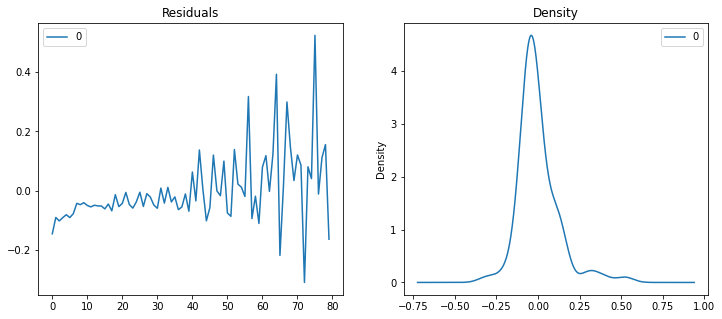

In [39]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize = (12,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

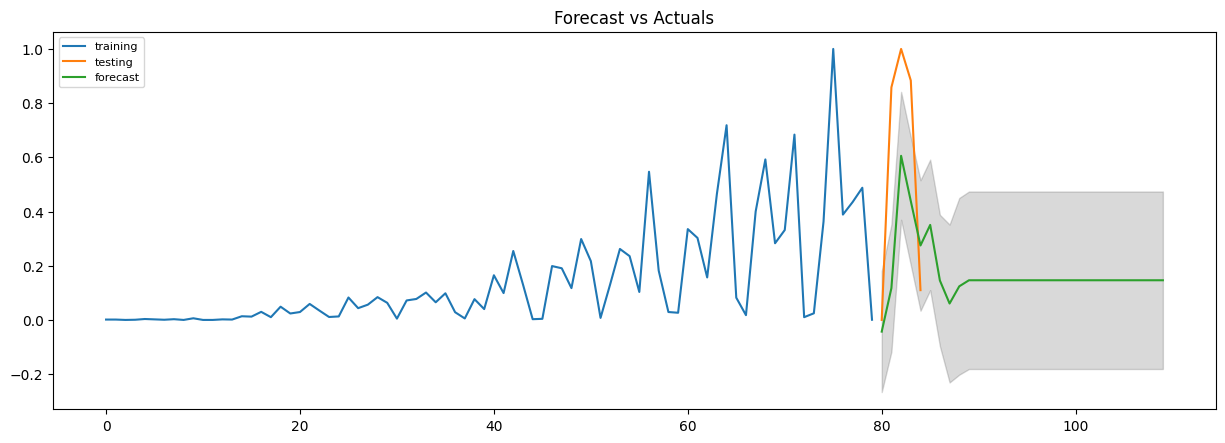

In [40]:
fc, se, conf = model_fit.forecast(30, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series([i for i in fc])
fc_series.index+=train_data.shape[0]
lower_series = pd.Series([i for i in conf[:, 0]])
lower_series.index+=train_data.shape[0]
upper_series = pd.Series([i for i in conf[:, 1]])
upper_series.index+=train_data.shape[0]





# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data,label = 'testing')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [41]:
test_d = np.reshape(sc.inverse_transform(test_data.values.reshape(-1,1)),newshape=(1,-1))[0]
test_d = [int(i) for i in test_d]
forecast_d = np.reshape(sc.inverse_transform(fc_series.values.reshape(-1,1)),newshape=(1,-1))[0]
forecast_d = [int(i) for i in forecast_d]

In [42]:
data_output = pd.concat([pd.Series(test_d),pd.Series(forecast_d)],axis = 1)
data_output.columns = ['test_data','forecasted']
data_output.index+= train_data.shape[0]

In [43]:
data_output

,test_data,forecasted
80,34.0,-25
81,1221.0,196
82,1417.0,871
83,1256.0,640
84,186.0,414
85,NaN,518
86,NaN,235
87,NaN,117
88,NaN,205
89,NaN,236


In [44]:
rmse = np.sqrt(mean_squared_error(data_output['test_data'].iloc[:test_data.shape[0]],data_output['forecasted'].iloc[:test_data.shape[0]]))
print(rmse)

597.2707928569754


**The low accuracy maybe related due to scaling of the data so using fbprophet in unscaled data**

## Using FbProphet fpr Prediction

https://facebook.github.io/prophet/docs/quick_start.html

https://facebook.github.io/prophet/docs/installation.html

In [45]:
from prophet import Prophet

In [46]:
train_size = int(0.85*daily_sum.shape[0])

In [54]:
daily_sum

,Value,Shift_1_diff
Date,,
2022-01-31,3,NaN
2022-02-17,3,0.0
2022-02-28,1,-2.0
2022-03-04,2,1.0
2022-03-31,6,4.0
2022-04-10,4,-2.0
2022-04-12,2,-2.0
2022-04-30,5,3.0
2022-05-06,1,-4.0


In [47]:
train = daily_sum.iloc[0:train_size,:]
test = daily_sum.iloc[train_size:,:]
train = train.reset_index()[['Date','Value']]
test = test.reset_index()[['Date','Value']]
train.columns = ['ds','y']
test.columns = ['ds','y']
print(train.tail())
print('\n',test.tail())


            ds     y
67  2022-07-11   591
68  2022-07-12   874
69  2022-07-13   418
70  2022-07-14   490
71  2022-07-15  1009

             ds     y
8   2022-07-24    34
9   2022-07-25  1221
10  2022-07-26  1417
11  2022-07-27  1256
12  2022-07-28   186


In [48]:
model_pr = Prophet()
model_pr.fit(train)

07:57:54 - cmdstanpy - INFO - Chain [1] start processing
07:57:54 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
future = model_pr.make_future_dataframe(periods=25)
future

,ds
0,2022-01-31
1,2022-02-17
2,2022-02-28
3,2022-03-04
4,2022-03-31
5,2022-04-10
6,2022-04-12
7,2022-04-30
8,2022-05-06
9,2022-05-08


In [50]:
forecast = model_pr.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
92,2022-08-05,537.155271,310.194657,767.922138
93,2022-08-06,277.261075,71.435704,497.087974
94,2022-08-07,330.465314,92.541722,546.176000
95,2022-08-08,549.628033,334.263546,772.323601
96,2022-08-09,516.575246,284.536663,736.088422


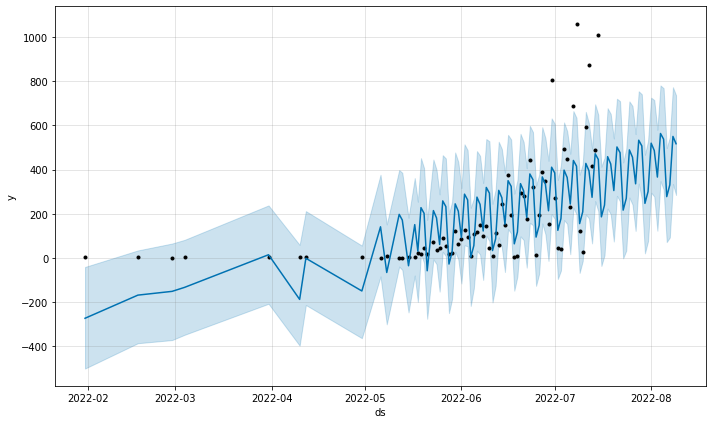

In [51]:
fig1 = model_pr.plot(forecast)

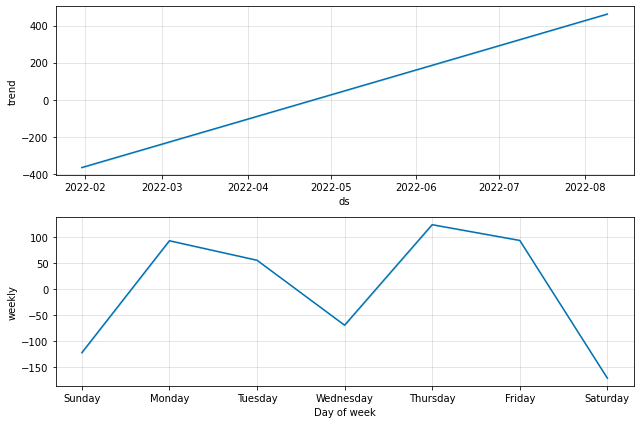

In [52]:
fig2 = model_pr.plot_components(forecast)


In [53]:
forecasts = forecast.iloc[test.index.start:,:][['ds','yhat','yhat_lower','yhat_upper']]
forecasts

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-31,-273.199483,-500.689828,-41.002375
1,2022-02-17,-168.430550,-386.088286,33.824939
2,2022-02-28,-151.379992,-371.819159,65.110982
3,2022-03-04,-133.374434,-348.080343,81.557540
4,2022-03-31,14.298688,-207.546148,237.453971
5,2022-04-10,-187.805658,-396.947554,58.846805
6,2022-04-12,-1.711357,-213.183800,211.650712
7,2022-04-30,-149.637463,-363.218652,55.805278
8,2022-05-06,140.719422,-83.729784,376.226885
9,2022-05-08,-65.986166,-300.528035,151.398155


In [55]:
test = test.reset_index(drop = True)
test

,ds,y
0,2022-07-16,16
1,2022-07-17,37
2,2022-07-18,536
3,2022-07-19,1475
4,2022-07-20,574
5,2022-07-21,642
6,2022-07-22,720
7,2022-07-23,2
8,2022-07-24,34
9,2022-07-25,1221


In [56]:
test.index+=train.shape[0]
test.head()

,ds,y
72,2022-07-16,16
73,2022-07-17,37
74,2022-07-18,536
75,2022-07-19,1475
76,2022-07-20,574


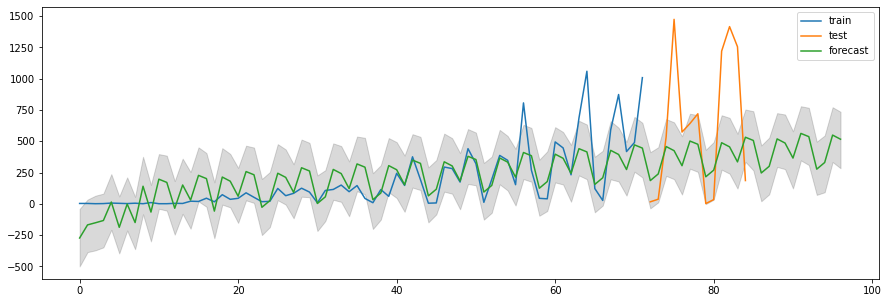

In [57]:
plt.figure(figsize = (15,5))
plt.plot(train['y'],label = 'train')
plt.plot(test['y'],label = 'test')
plt.plot(forecasts['yhat'],label = 'forecast')
plt.fill_between(forecasts.index,forecasts['yhat_lower'],forecasts['yhat_upper'],color = 'k',alpha = 0.15)
plt.legend(loc = 'best')
plt.show()

In [58]:
forecasts['yhat'].iloc[:test.shape[0]]

0    -273.199483
1    -168.430550
2    -151.379992
3    -133.374434
4      14.298688
5    -187.805658
6      -1.711357
7    -149.637463
8     140.719422
9     -65.986166
10    197.027925
11    171.174295
12    -35.528499
Name: yhat, dtype: float64

In [59]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['y'],forecasts['yhat'].iloc[:test.shape[0]]))
print(rmse)

837.2518136905461


## Using RNNs

In [ ]:
rnn_feed = daily_sum.drop(columns=['Shift_1_diff'],axis = 1).reset_index()
rnn_feed.head()

In [ ]:
features = []
labels = []
train_length = 10
sequences = np.array(rnn_feed['Value'])

for i in range(train_length,len(sequences)):
    extract = sequences[i-train_length:i+1]
    feature = extract[:-1]
    label = extract[-1]
    features.append(np.array(feature))
    labels.append(np.array(label))
    
    
features = np.array(features)
labels = np.array(labels)
    
    

In [ ]:
features.shape

In [ ]:
print("Past Data: ",features[20],"Prediction Based on Past: ",labels[20])

In [ ]:
#Splitting into train and test
print(features[0], labels[0])
print(features[1],labels[1])

In [ ]:
train_size = int(features.shape[0]*0.90)
X_train = features[0:train_size]
y_train = labels[0:train_size]
X_test = features[train_size:]
y_test = labels[train_size:]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
X_train = np.reshape(a = X_train,newshape=(X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(a = X_test,newshape=(X_test.shape[0], X_test.shape[1], 1))

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout,Bidirectional, BatchNormalization, Input
from tensorflow.keras import callbacks

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(units = 30,return_sequences=True,return_state=False),input_shape = (X_train.shape[1],1)))
model.add(LSTM(units = 30,return_sequences=True,recurrent_dropout=0.1,return_state=False))
# model.add(BatchNormalization(momentum=0.99))
model.add(Dropout(0.30))

model.add(LSTM(units=30,return_sequences=True,return_state=False))
model.add(LSTM(units = 30,return_sequences=True,recurrent_dropout=0.1,return_state=False))
# model.add(BatchNormalization(momentum=0.99))
model.add(Dropout(0.30))


model.add(LSTM(units = 30,recurrent_dropout=0.1))
# model.add(BatchNormalization(momentum=0.99))
model.add(Dropout(0.30))

model.add(Dense(1,activation = 'linear'))
model.compile(optimizer='adam',loss = 'mean_squared_error',metrics = ['mean_absolute_error'])
model.summary()

In [ ]:
callbacks = [callbacks.ReduceLROnPlateau(verbose=1,factor=1e-04),callbacks.EarlyStopping(verbose=1,patience=15)]

In [ ]:
history = model.fit(X_train,y_train,batch_size=8,epochs = 10000,validation_split=0.1,callbacks=callbacks)

In [ ]:
history.history.keys()

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Validation'])

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['Train','Validation'])

In [ ]:
plt.figure(figsize = (10,3))
plt.plot(history.history['lr'])

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

In [ ]:
pd_test = pd.Series(y_test)
pd_test.index+=y_train.shape[0]


In [ ]:
pred.reshape(1,-1)

In [ ]:
pd_pred = pd.Series(pred.reshape(1,-1)[0])
pd_pred.index+=y_train.shape[0]

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(y_train,'-r',label = 'Train')
plt.plot(pd_test,'-b',label ='Test')
plt.plot(pd_pred,'-g',label = 'Predicted')
plt.legend()

## Other Analysis

In [60]:
data_to_pred = df_daily.sum().drop('Country')
data_to_pred = data_to_pred.to_frame()
data_to_pred.reset_index(inplace=True)
data_to_pred.columns = ['Date','Confirmed_Cases']


In [61]:
data_to_pred['Date'] = pd.to_datetime(data_to_pred['Date'])

In [62]:
data_to_pred_month = data_to_pred.copy(deep=True)
data_to_pred_month['Month'] = data_to_pred['Date'].dt.strftime("%b")
data_to_pred_month.head()

,Date,Confirmed_Cases,Month
0,2022-01-31,3,Jan
1,2022-02-17,3,Feb
2,2022-02-28,1,Feb
3,2022-03-04,2,Mar
4,2022-03-31,6,Mar


<AxesSubplot:xlabel='Month'>

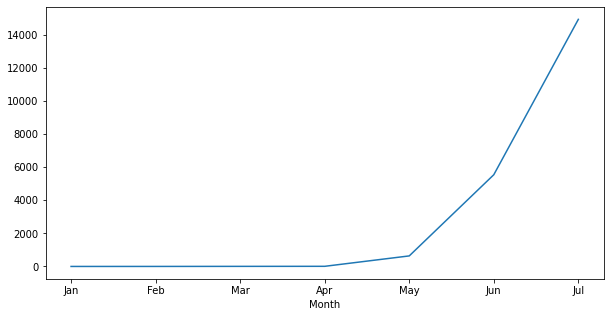

In [64]:
pred_month = data_to_pred_month.groupby('Month')['Confirmed_Cases'].sum()
pred_month.index = pd.CategoricalIndex(data = pred_month.index,categories=data_to_pred_month['Month'].unique(),
                                      ordered = True)
pred_month = pred_month.sort_index()
pred_month.plot(kind = 'line',figsize = (10,5))

**Almost Linear Growth After May**

In [65]:
df_daily_new = df_daily.transpose()
header = df_daily_new.iloc[0]
df_daily_new = df_daily_new[1:]
df_daily_new.columns = header
df_daily_new.head()

Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,France,Italy,Sweden,Belgium,Canada,Germany,Australia,Netherlands,Israel,Switzerland,Scotland,Austria,Denmark,United Arab Emirates,Slovenia,Czech Republic,...,Peru,Estonia,Puerto Rico,Turkey,Panama,Jamaica,Ecuador,Dominican Republic,Slovakia,New Zealand,China,New Caledonia,Russia,Bosnia And Herzegovina,Saudi Arabia,India,Martinique,Barbados,Qatar,Costa Rica,Thailand,Bermuda,Andorra,Guadeloupe,Japan
2022-01-31,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-02-17,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-02-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-03-04,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-03-31,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
df_world.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,2325.0,0.0,5.0,2.0,7.0
1,Portugal,633.0,0.0,0.0,0.0,34.0
2,Spain,3738.0,0.0,11.0,2.0,0.0
3,United States,4630.0,0.0,4.0,39.0,6.0
4,Canada,744.0,9.0,1.0,2.0,0.0


In [67]:
df_world.nlargest(n= 15,columns= 'Confirmed_Cases')

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
3,United States,4630.0,0.0,4.0,39.0,6.0
2,Spain,3738.0,0.0,11.0,2.0,0.0
10,Germany,2540.0,0.0,18.0,19.0,16.0
0,England,2325.0,0.0,5.0,2.0,7.0
7,France,1829.0,0.0,1.0,2.0,1.0
37,Brazil,978.0,7.0,2.0,20.0,4.0
11,Netherlands,878.0,0.0,0.0,1.0,0.0
4,Canada,744.0,9.0,1.0,2.0,0.0
1,Portugal,633.0,0.0,0.0,0.0,34.0
6,Italy,426.0,1.0,18.0,19.0,4.0


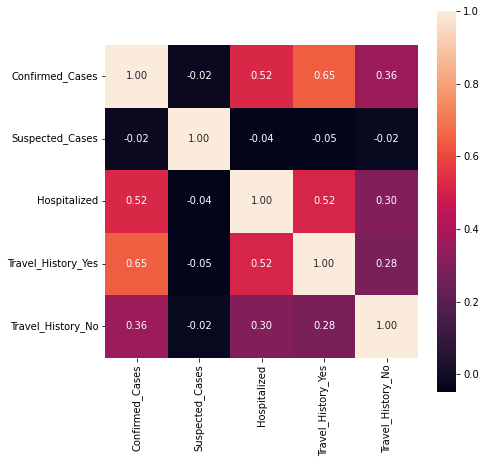

In [68]:
plt.figure(figsize = (7,7))
sns.heatmap(data = df_world.corr(),fmt = '.2f',linecolor='white',square=True,annot=True)
plt.show()

**Confirmed Cases increases with increase in travel history**

**More Confirmed Cases more hospitalization**

**People are getting affected even without travel history so the disease has entered the society as well**



Text(0.5, 1.0, 'Most Confirmed Cases')

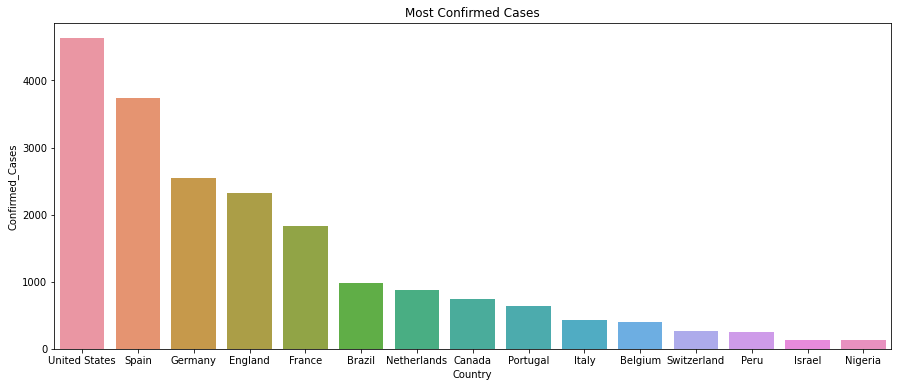

In [69]:
most_affected_15 = df_world.nlargest(n= 15,columns= 'Confirmed_Cases')[['Country','Confirmed_Cases']]
plt.figure(figsize = (15,6))
sns.barplot(x = 'Country',y = 'Confirmed_Cases',data = most_affected_15)
plt.title('Most Confirmed Cases')

Text(0.5, 1.0, 'Most Hospitalized Countries')

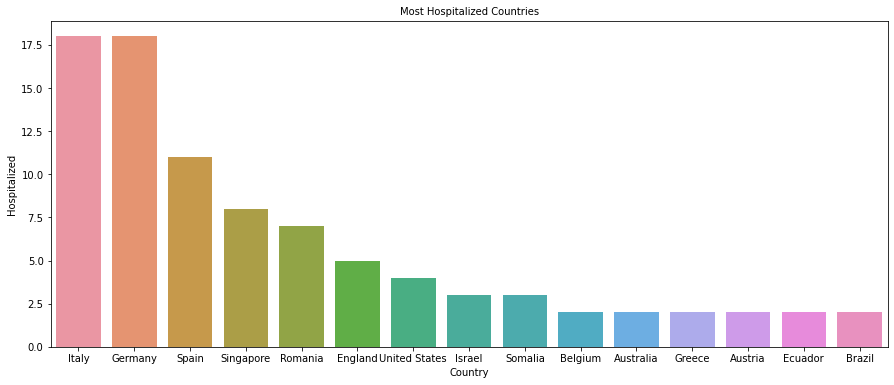

In [70]:
most_hospitalized= df_world.nlargest(n = 15,columns='Hospitalized')
plt.figure(figsize = (15,6))
sns.barplot(x = 'Country',y = 'Hospitalized',data = most_hospitalized)
plt.title('Most Hospitalized Countries',fontsize = 10)

In [71]:
#Travel Based Analysis
travel = df_world.copy()
travel['frequency_of_travel'] = pd.cut(x = travel['Travel_History_Yes'],bins=[-1,0,5,12,18,25,100], 
                                       labels = ['zero','1-5','6-12','13-18','19-25','25+'])
travel.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,frequency_of_travel
0,England,2325.0,0.0,5.0,2.0,7.0,1-5
1,Portugal,633.0,0.0,0.0,0.0,34.0,zero
2,Spain,3738.0,0.0,11.0,2.0,0.0,1-5
3,United States,4630.0,0.0,4.0,39.0,6.0,25+
4,Canada,744.0,9.0,1.0,2.0,0.0,1-5


<AxesSubplot:xlabel='frequency_of_travel', ylabel='Confirmed_Cases'>

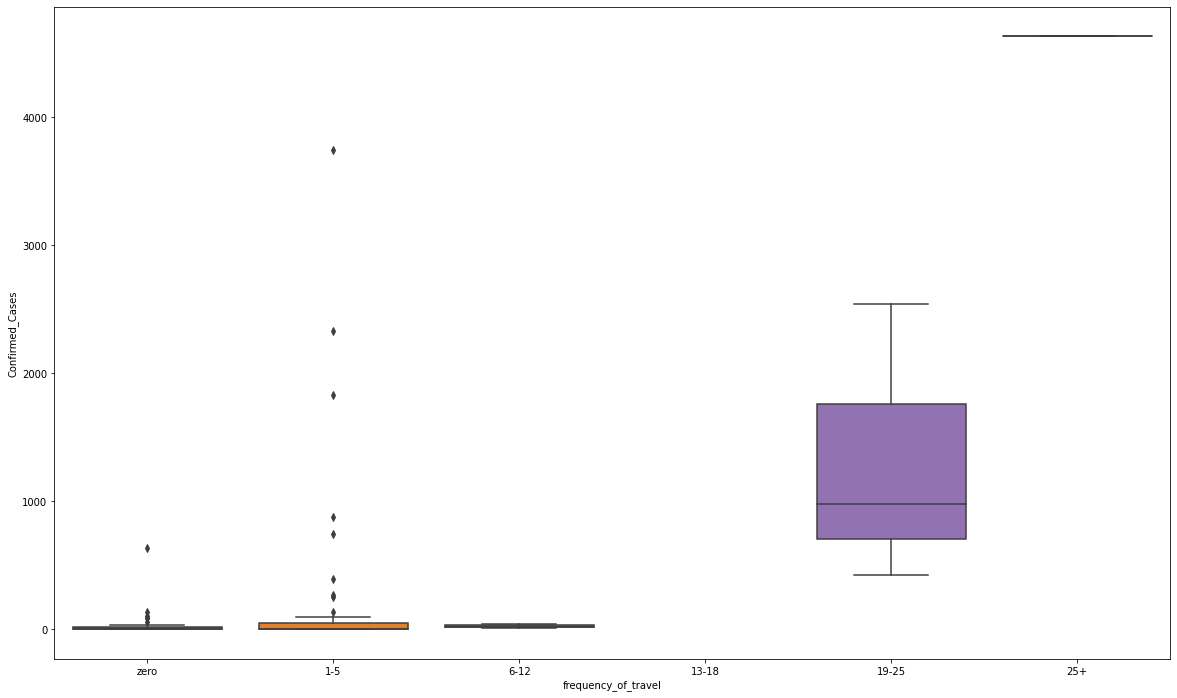

In [72]:
plt.figure(figsize= (20,12))
sns.boxplot(x = travel['frequency_of_travel'],y = travel['Confirmed_Cases'])

**Disease spread the most when people travel more**

In [73]:
#Travel Based Analysis
travel['frequency_of_no_travel'] = pd.cut(x = travel['Travel_History_No'],bins=[-1,0,5,12,18,25,100], 
                                       labels = ['zero','1-5','6-12','13-18','19-25','25+'])
travel.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,frequency_of_travel,frequency_of_no_travel
0,England,2325.0,0.0,5.0,2.0,7.0,1-5,6-12
1,Portugal,633.0,0.0,0.0,0.0,34.0,zero,25+
2,Spain,3738.0,0.0,11.0,2.0,0.0,1-5,zero
3,United States,4630.0,0.0,4.0,39.0,6.0,25+,6-12
4,Canada,744.0,9.0,1.0,2.0,0.0,1-5,zero


<AxesSubplot:xlabel='frequency_of_no_travel', ylabel='Confirmed_Cases'>

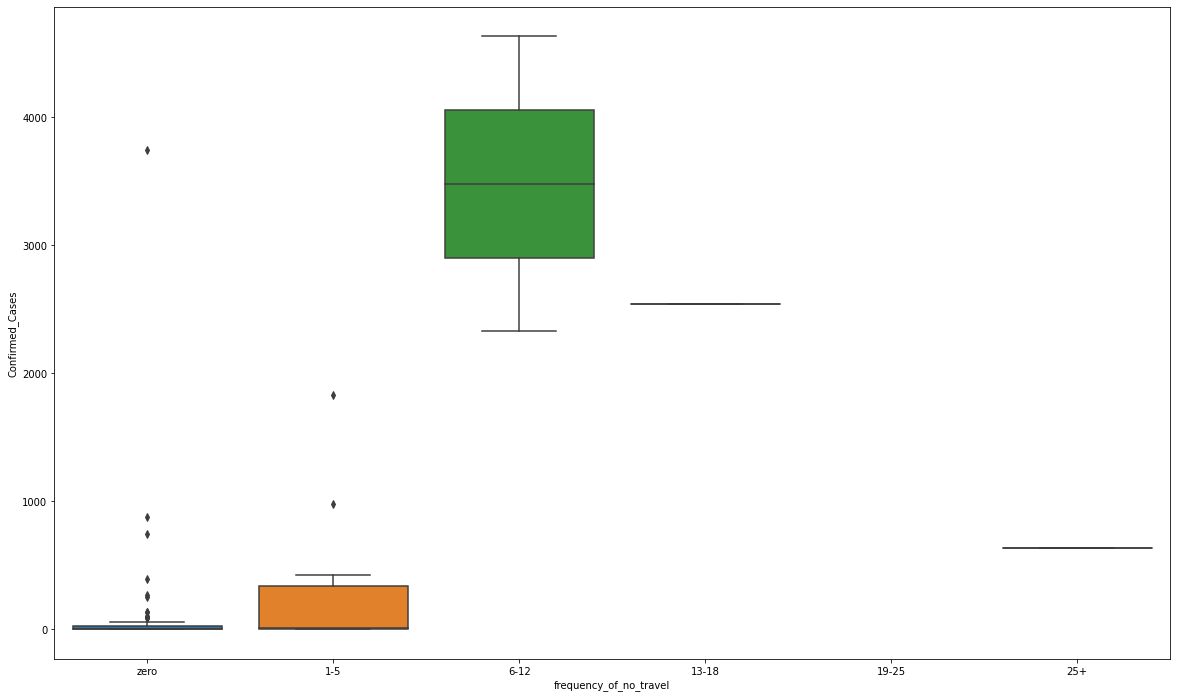

In [74]:
plt.figure(figsize= (20,12))
sns.boxplot(x = travel['frequency_of_no_travel'],y = travel['Confirmed_Cases'])

**The more the no travel, the less the number of confirmed cases, so the less the spread**

In [75]:
df_world_timeline.head()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


In [76]:
df_world_timeline['Month'] = pd.to_datetime(df_world_timeline['Date_confirmation']).dt.month_name()

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

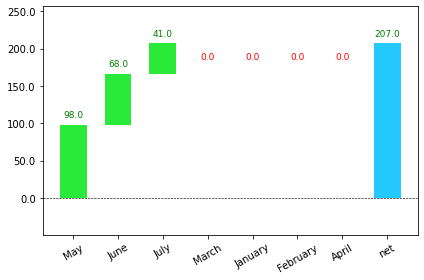

In [77]:
df_month_hosp = df_world_timeline.groupby(['Month'])['Hospitalised (Y/N/NA)'].count()
waterfall_chart.plot(data = df_month_hosp.values,index = df_month_hosp.index,sorted_value=True)

**Highest Growth was in May Till Now**